# Exercícios

1. Ajustar o modelo ''Na mão'' utilizando o dataset *Advertising* para, dado o valor gasto com propaganda na TV, predizer a quantidade de produtos vendidos.

2. Ajustar o modelo utilizando scikit-learn para predizer a quantidade de produtos vendidos considerando os gastos em propaganda na TV, Rádio e Jornal (newspaper).

---

In [1]:
import pandas as pd # biblioteca para importar e manusear dados.
import numpy as np # biblioteca com funções para lidar com arrays, expressões matemáticas, dentre outros.
from matplotlib import pyplot as plt # biblioteca para plotar dados.

# Gerando dados aleatórios
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array com 100 valores com média 1.5 e desvio 2.5
res = 0.5 * np.random.randn(100)       # gerando 100 termos residuais
y = 2 + 0.3 * X + res                  # valores reais de y

# Criando uma dataframe Pandas para armazenar nossos valores de X e y.
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# mostrando as primeiras 5 linhas do nosso dataframe.
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [2]:
# Importa e mostra as cinco primeiras linhas do dataset advertising.

# pode ser baixado em: https://www.kaggle.com/purbar/advertising-data#Advertising.csv

advert = pd.read_csv('../../../dataset/Advertising.csv')
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## 1. Regressão a partir das propagandas de TV

In [3]:
advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Selecionando as variáveis

In [4]:
X = advert['TV']
y = advert['sales']

### Cálculo dos coeficientes

In [5]:
# Calculando as médias de X e y.
xmean = np.mean(X)
ymean = np.mean(y)

# Calcular os termos necessários para encontrar 𝛽, 
# i.e., o numerador (covariancia entre X e y) e o denominador (variância de X).
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Computando 𝛽 e 𝛼.
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.3947740759927534
beta = 0.07907731386508833


### Comparando a predição com os dados reais

In [6]:
ypred = alpha + beta * X

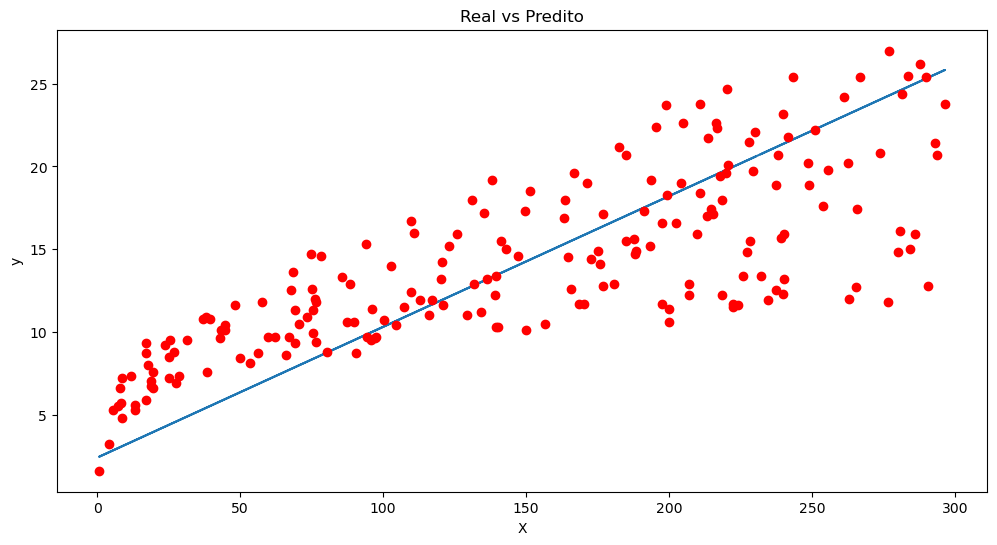

In [7]:
# Plotando a regressão contra os dados reais
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # linha da regressão
plt.plot(X, y, 'ro')   # scatter plot mostrando os dados reais
plt.title('Real vs Predito')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

## 2. Regressão linear multivariada usando scikit-learn

### Selecionando as variáveis

In [8]:
advert.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [9]:
X = advert[['TV', 'radio', 'newspaper']]
y = advert['sales']

### Implementando o modelo de regressão linear

In [10]:
from sklearn.linear_model import LinearRegression

# Constroi o modelo de regressão linear usando as variáveis TV e Radio.
# Separa os dados em variáveis de predição de entrada X e a saída y
predictors = ['TV', 'radio', 'newspaper']
X = advert[predictors]
y = advert['sales']

# Inicializa e ajusta o modelo
lm = LinearRegression()
model = lm.fit(X, y)

### Encontrando os coeficientes

* Podemos usar as funções `intercept_` ($\alpha$) e `coef_` ($\beta_i$)

In [11]:
alpha = model.intercept_
betas = model.coef_

print(f'alpha = {alpha}')
print(f'betas = {betas}')

alpha = 2.9388893694594085
betas = [ 0.04576465  0.18853002 -0.00103749]


In [12]:
print(f'vendas = {alpha.round(3)} + {betas[0].round(3)}*TV + {betas[1].round(3)}*radio + {betas[2].round(3)}*newspaper')

vendas = 2.939 + 0.046*TV + 0.189*radio + -0.001*newspaper


* Ou simplesmente usar a função `predict_`

In [13]:
vendas = model.predict(X)

### Prevendo novos valores

In [14]:
new_X = [[300, 200, 100]]
print(model.predict(new_X))

[54.27053709]
